# Customer_churn 

# importing libraries 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.rcParams['figure.figsize']=[8,3]

In [28]:
df=pd.read_csv("customer_churn.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


# Data Cleaning 

In [29]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [30]:
##checking missing values 

In [31]:

print(df.isnull().sum())


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [32]:
## removing duplicates 

In [33]:

df.drop_duplicates(inplace=True)


In [34]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [35]:
print(df.dtypes)

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object


In [36]:
df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [38]:

for column in numerical_columns:
    if df[column].dtype != 'object':
        lower_bound = df[column].quantile(0.01)  # 1st percentile
        upper_bound = df[column].quantile(0.99)  # 99th percentile
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


In [39]:

print(f"Initial dataset shape: {df.shape}")
print(df.describe())

numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                     'Payment Delay', 'Total Spend', 'Contract Length']


for column in numerical_columns:
    if df[column].dtype != 'object':  # Ensure only numeric columns are processed
        lower_bound = df[column].quantile(0.01)  # 1st percentile
        upper_bound = df[column].quantile(0.99)  # 99th percentile
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


print(f"Dataset shape after capping outliers: {df.shape}")
print(df.describe())


Initial dataset shape: (64374, 12)
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.017321         15.498850   
std         3.114005       8.852211    260.704765          8.638436   
min         0.000000       0.000000    109.000000          1.000000 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Tenure', 'Total Spend']] = scaler.fit_transform(df[['Age', 'Tenure', 'Total Spend']])


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Tenure', 'Total Spend']] = scaler.fit_transform(df[['Age', 'Tenure', 'Total Spend']])


In [43]:
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         64374 non-null  int64  
 1   Age                64374 non-null  float64
 2   Gender             64374 non-null  object 
 3   Tenure             64374 non-null  float64
 4   Usage Frequency    64374 non-null  int64  
 5   Support Calls      64374 non-null  int64  
 6   Payment Delay      64374 non-null  int64  
 7   Subscription Type  64374 non-null  object 
 8   Contract Length    64374 non-null  object 
 9   Total Spend        64374 non-null  float64
 10  Last Interaction   64374 non-null  int64  
 11  Churn              64374 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 6.4+ MB
None
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500

In [44]:
df.to_csv('cleaned_customer_churn.csv', index=False)


In [45]:
churn_rate = df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")


Churn Rate: 47.37%


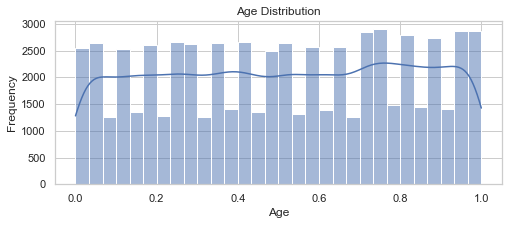

In [46]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


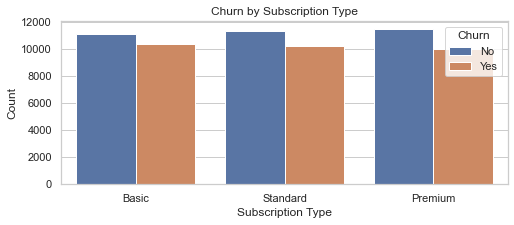

In [47]:
sns.countplot(data=df, x='Subscription Type', hue='Churn')
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


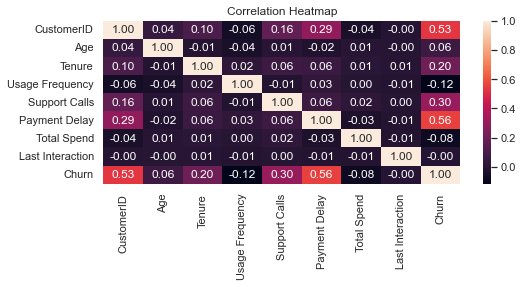

In [49]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [50]:
churn_analysis = df.groupby('Churn').mean()
print(churn_analysis)


         CustomerID       Age    Tenure  Usage Frequency  Support Calls  \
Churn                                                                     
0      22846.794959  0.492185  0.471635        16.042915       4.500753   
1      42566.027121  0.529838  0.585003        14.010593       6.400617   

       Payment Delay  Total Spend  Last Interaction  
Churn                                                
0          12.453086     0.512521         15.521944  
1          22.334897     0.465761         15.473191  


In [51]:
from scipy.stats import ttest_ind

churned = df[df['Churn'] == 1]['Age']
not_churned = df[df['Churn'] == 0]['Age']

t_stat, p_value = ttest_ind(churned, not_churned)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 16.13258465464614, P-value: 1.9615249904083926e-58


In [56]:
train=pd.read_csv('cleaned_customer_churn.csv')
train.shape

(64374, 12)

In [57]:
test=pd.read_csv('cleaned_customer_churn.csv')
test.shape

(64374, 12)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df and is already cleaned

# Separate features and target variable
X = df.drop(['Churn', 'CustomerID', 'Gender'], axis=1)  # Exclude target and irrelevant columns
y = df['Churn']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f'Train features shape: {X_train.shape}')
print(f'Test features shape: {X_test.shape}')
print(f'Train target shape: {y_train.shape}')
print(f'Test target shape: {y_test.shape}')


Train features shape: (51499, 9)
Test features shape: (12875, 9)
Train target shape: (51499,)
Test target shape: (12875,)


In [59]:
print(df.shape)


(64374, 12)


In [62]:
print(f"Original DataFrame shape: {df.shape}")


Original DataFrame shape: (64374, 12)


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

print(f"Original DataFrame shape: {df.shape}")

X = df.drop(['Churn', 'CustomerID', 'Gender'], axis=1)  
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train features shape: {X_train.shape}")  
print(f"Test features shape: {X_test.shape}")    
print(f"Train target shape: {y_train.shape}")     
print(f"Test target shape: {y_test.shape}")    


Original DataFrame shape: (64374, 12)
Train features shape: (51499, 9)
Test features shape: (12875, 9)
Train target shape: (51499,)
Test target shape: (12875,)


In [68]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"After split - Train features shape: {X_train.shape}")
print(f"After split - Test features shape: {X_test.shape}")
print(f"After split - Train target shape: {y_train.shape}")
print(f"After split - Test target shape: {y_test.shape}")


After split - Train features shape: (51499, 9)
After split - Test features shape: (12875, 9)
After split - Train target shape: (51499,)
After split - Test target shape: (12875,)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,0.085106,Female,0.406780,14,4,27,Basic,Monthly,0.555051,9,1
1,2,0.489362,Female,0.457627,28,7,13,Standard,Monthly,0.539160,20,0
2,3,0.617021,Male,0.440678,10,2,29,Premium,Annual,0.735528,21,0
3,4,0.361702,Male,0.135593,12,5,17,Premium,Quarterly,0.139614,18,0
4,5,0.744681,Female,0.966102,24,9,2,Standard,Annual,0.481271,18,0


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [73]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['Subscription Type', 'Contract Length'], drop_first=True)


In [74]:
# Prepare features (X) and target variable (y)
X = df.drop(['Churn', 'CustomerID', 'Gender'], axis=1)  # Exclude target and non-numerical columns
y = df['Churn']


In [75]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[5588 1205]
 [1085 4997]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6793
           1       0.81      0.82      0.81      6082

    accuracy                           0.82     12875
   macro avg       0.82      0.82      0.82     12875
weighted avg       0.82      0.82      0.82     12875



In [77]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[6223  570]
 [  47 6035]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6793
           1       0.91      0.99      0.95      6082

    accuracy                           0.95     12875
   macro avg       0.95      0.95      0.95     12875
weighted avg       0.96      0.95      0.95     12875



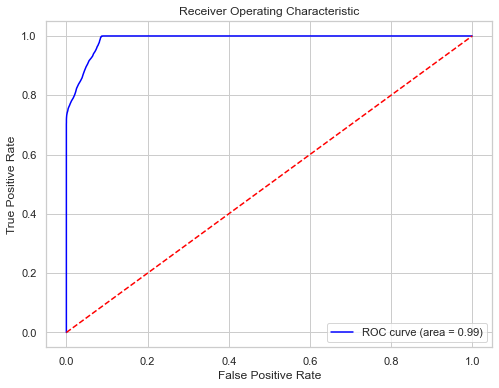

In [78]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
